# Part f): Cross-validation as resampling techniques

/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e-01, tolerance: 2.847e-03
  model = cd_fast.enet_coordinate_descent(
/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e-02, tolerance: 3.134e-03
  model = cd_fast.enet_coordinate_descent(
/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataana

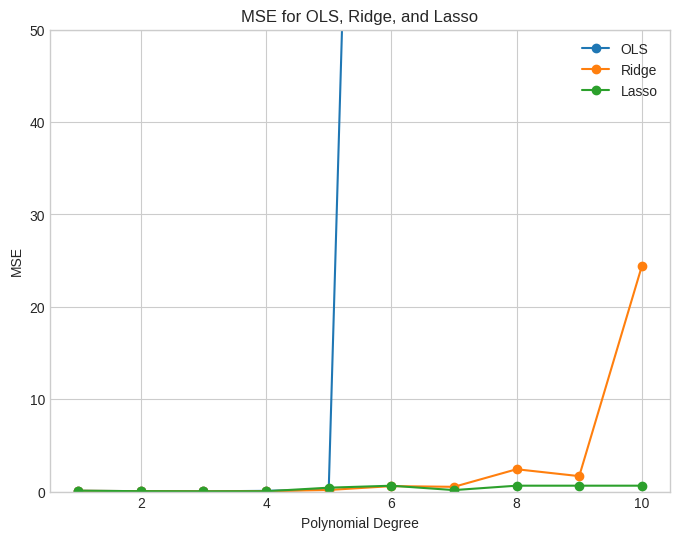

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')

# Generate the Franke function data
np.random.seed(42)
N = 50
x = np.random.rand(N)
y = np.random.randn(N)
z = f.FrankeFunction(x,y) #Using x,y and z when doing regression
z = z + np.random.normal(0, 0.1, z.shape) #the noise was too high, tried sligtly less

# Define the range of polynomial degrees to test
degrees = np.arange(1, 11)

# Define the number of folds
k_folds = 10

# Define the range of lambda values to test
nlambdas = 5
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize arrays to store the MSE values
mse_ols = np.zeros_like(degrees, dtype=float)
mse_ridge = np.zeros_like(degrees, dtype=float)
mse_lasso = np.zeros_like(degrees, dtype=float)

# Perform k-fold cross-validation for each degree
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))
    
    # Perform k-fold cross-validation for ordinary least squares
    model_ols = LinearRegression()
    mse_ols[i] = -np.mean(cross_val_score(model_ols, X, z, cv=k_folds, scoring='neg_mean_squared_error'))

    # Ridge Regression
    mse_ridge_lambdas = np.zeros(len(lambdas))
    for j, lmb in enumerate(lambdas):
        ridge = Ridge(alpha=lmb, fit_intercept=False, max_iter=10000)
        mse_ridge_lambdas[j] = -np.mean(cross_val_score(ridge, X, z.ravel(), scoring='neg_mean_squared_error', cv=k_folds))
    # Store the minimum MSE over lambdas for this degree
    mse_ridge[i] = np.min(mse_ridge_lambdas)

    # Lasso Regression
    mse_lasso_lambdas = np.zeros(len(lambdas))
    for j, lmb in enumerate(lambdas):
        lasso = Lasso(alpha=lmb, fit_intercept=False, max_iter=10000)
        mse_lasso_lambdas[j] = -np.mean(cross_val_score(lasso, X, z.ravel(), scoring='neg_mean_squared_error', cv=k_folds))
    # Store the minimum MSE over lambdas for this degree
    mse_lasso[i] = np.min(mse_lasso_lambdas)



# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_ols, label='OLS', marker='o')
plt.plot(degrees, mse_ridge, label='Ridge', marker='o')
plt.plot(degrees, mse_lasso, label='Lasso', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.ylim(0, 50)
plt.title('Cross Validation for MSE for OLS, Ridge, and Lasso')
plt.legend()
plt.show()
